# Books (Core)

Anjali Prakash

ERD Diagram for relationship between users and books
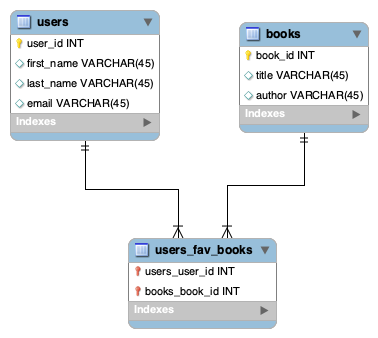